In [ ]:
#Edge detection techniques

True

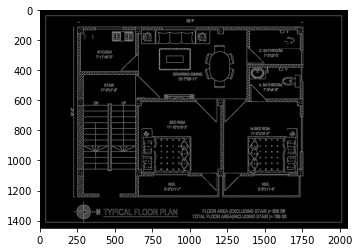

In [1]:
#Simple canny edge detection 
#by changing blur values, we can adjest density of blurness

import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("C:/Users/ChinmayB/Downloads/free-modern-house-plans-pdf-free-2048x1449.jpg")
#image = cv2.imread("C:/Users/ChinmayB/Downloads/pexels-moose-photos-1036635.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray');


blur = cv2.GaussianBlur(gray, (1,1), 0)
plt.imshow(blur, cmap='gray')


canny = cv2.Canny(blur, 100, 150, 3)
plt.imshow(canny, cmap='gray')
cv2.imwrite("canny1.jpg",canny)


In [24]:
#sobel edge detection
#we can provide minimum and maximum threshold according to our need

import cv2

# Read the original image

img = cv2.imread('C:/Users/ChinmayB/Downloads/free-modern-house-plans-pdf-free-2048x1449.jpg')
#img = cv2.imread("C:/Users/ChinmayB/Downloads/pexels-moose-photos-1036635.jpg")

# Display original image

#cv2.imshow('Original', img)

#cv2.waitKey(0)

# Convert to graycsale

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images

#cv2.imshow('Sobel X', sobelx)
#cv2.imwrite("SobelX.jpg",sobelx)
#cv2.waitKey(0)

#cv2.imshow('Sobel Y', sobely)
#cv2.imwrite("Sobely.jpg",sobely)
#cv2.waitKey(0)

#cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
#cv2.imwrite("sobel xy.jpg",sobelxy)
#cv2.waitKey(0)

# Cnny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=290, threshold2=300) # Canny Edge Detection
filename = 'savedImage1.jpg'

# Display Canny Edge Detection Image
#cv2.imshow('Canny Edge Detection', edges)
cv2.imwrite(filename, edges)
#cv2.waitKey(0)


True

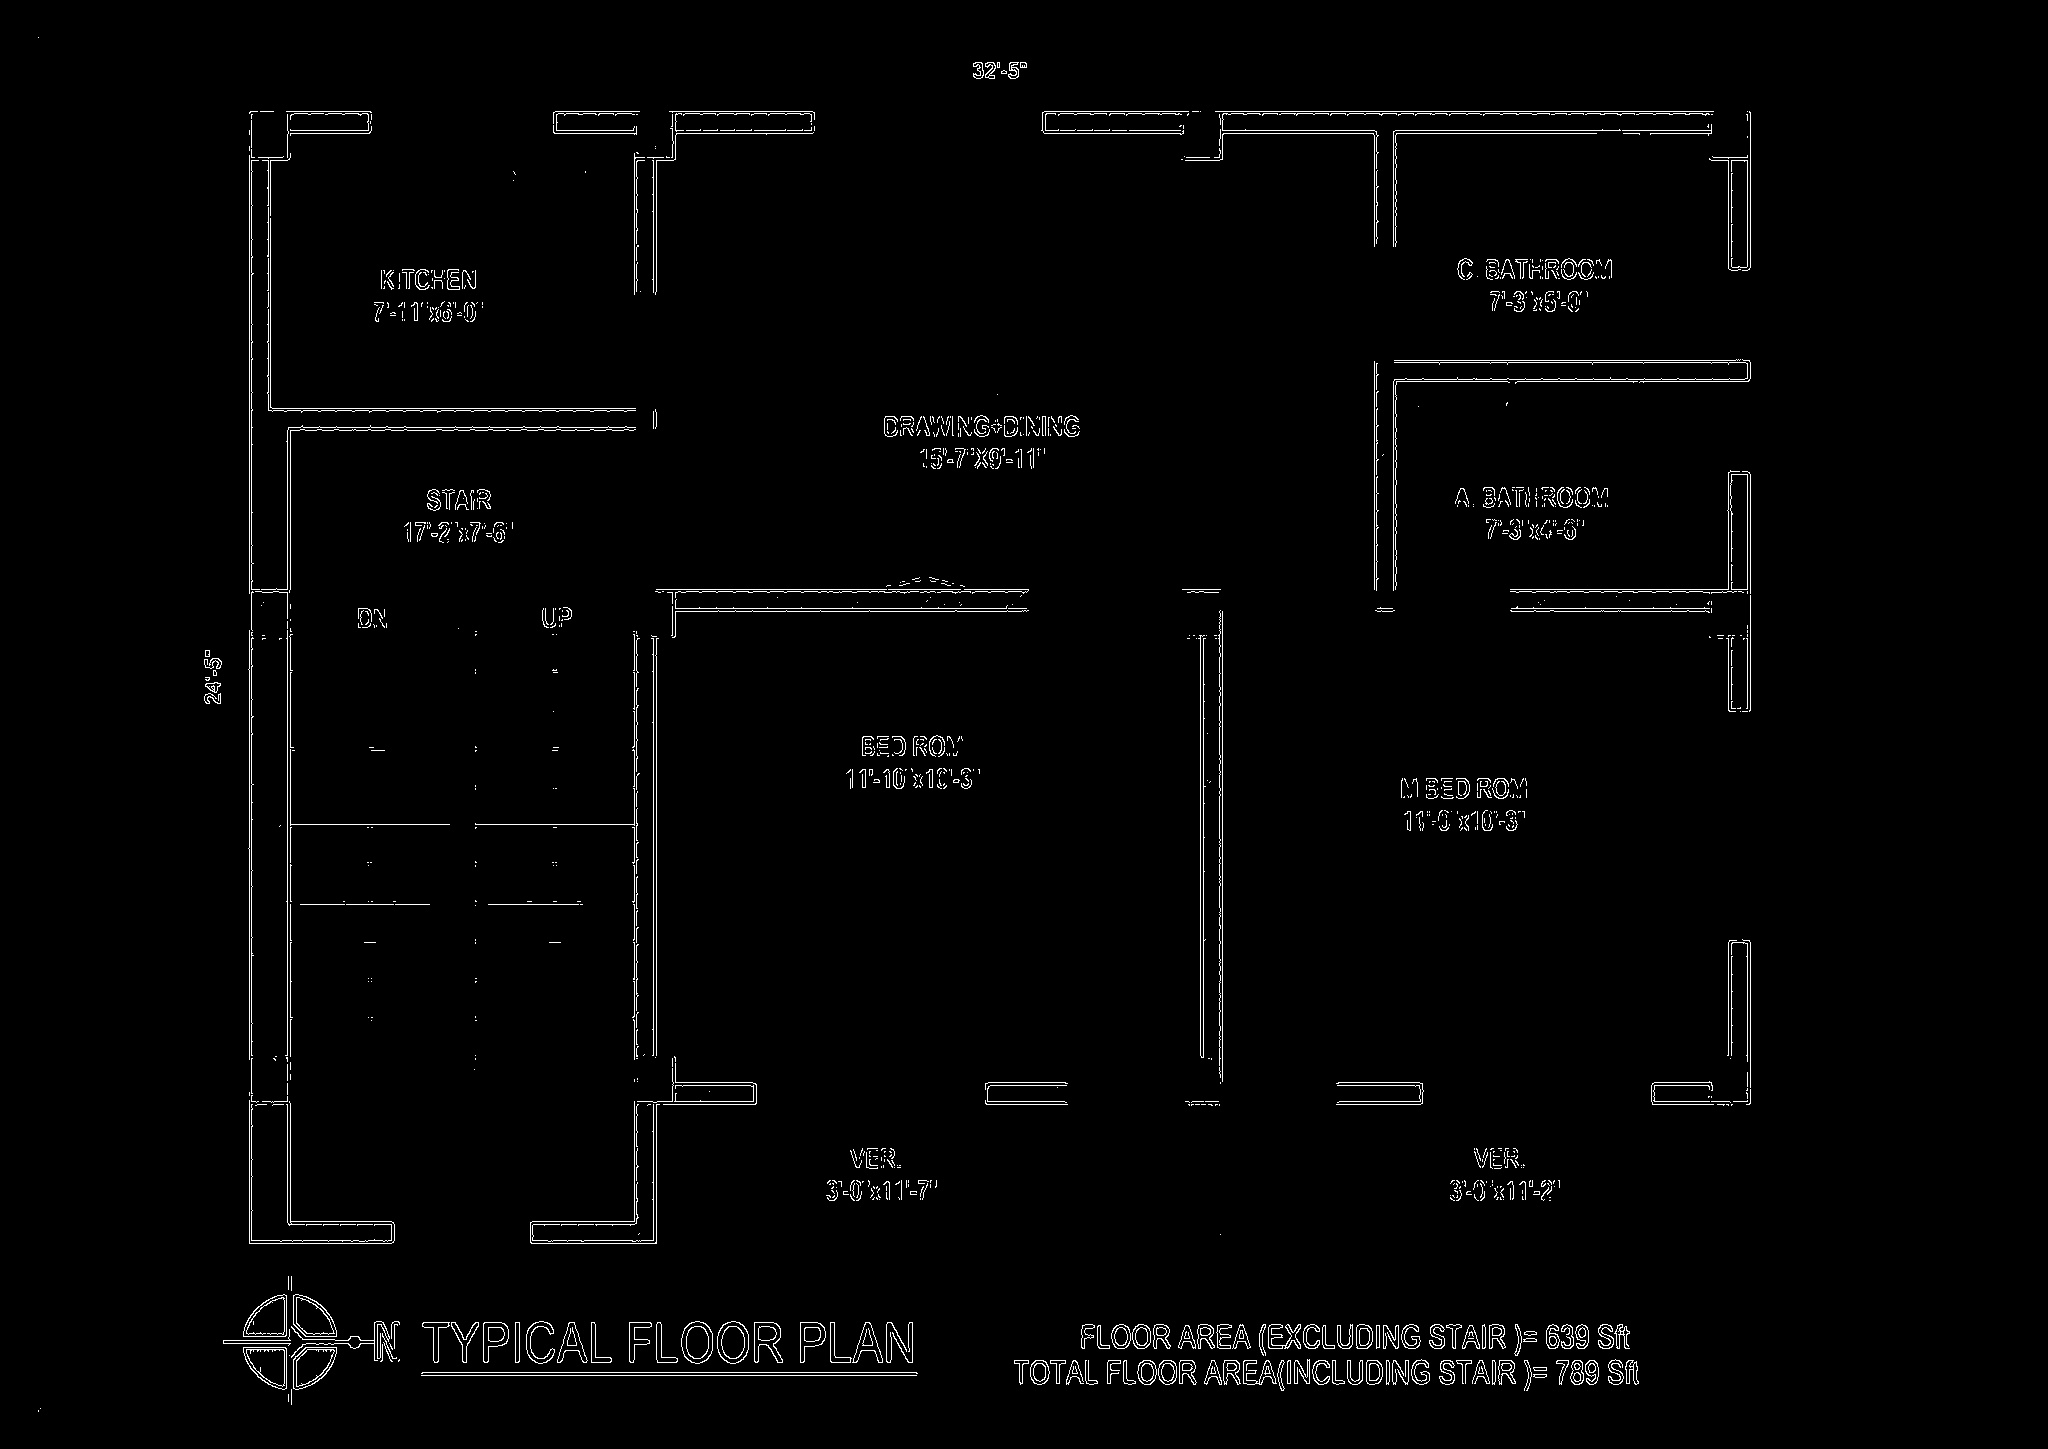

In [3]:
#Fill the color by mouse click on image after edge detection
from tkinter import *
from PIL import Image, ImageTk

click_num = 0

def draw_rect(event):
    global click_num 
    global x1
    global y1   
    
    if click_num == 0:
        x1 = event.x
        y1 = event.y
        click_num = 1
    else:
        x2 = event.x
        y2 = event.y
        c.create_rectangle(x1,y1,x2,y2,fill='white')
        click_num = 0
        
       
        
root = Tk()
root.geometry("1200x600")

c = Canvas(root, bg='white')
c.pack(anchor='nw', fill='both', expand=1)

img = Image.open('C:/Users/ChinmayB/Desktop/Results/savedImage.jpg')
img = img.resize((1200,600), Image.ANTIALIAS)
img = ImageTk.PhotoImage(img)

c.create_image(0,0, image=img, anchor='nw')


c.bind('<Button-1>', draw_rect)

root.mainloop()

TclError: image "pyimage1" doesn't exist

In [ ]:
#Masking components in 2D floor plan

import cv2
import numpy as np
im_in = cv2.imread("C:/Users/ChinmayB/Downloads/SO.png", cv2.IMREAD_GRAYSCALE)

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV)

# Copy the thresholded image.
im_floodfill = im_th.copy()
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
# # Display images.
#cv2.imshow("Thresholded Image", im_th)
#cv2.imshow("Floodfilled Image", im_floodfill)
#cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
filename = "Forground.jpg"
#cv2.imwrite("Foreground", im_out)

cv2.imwrite(filename, im_out)



# cv2.waitKey(0)


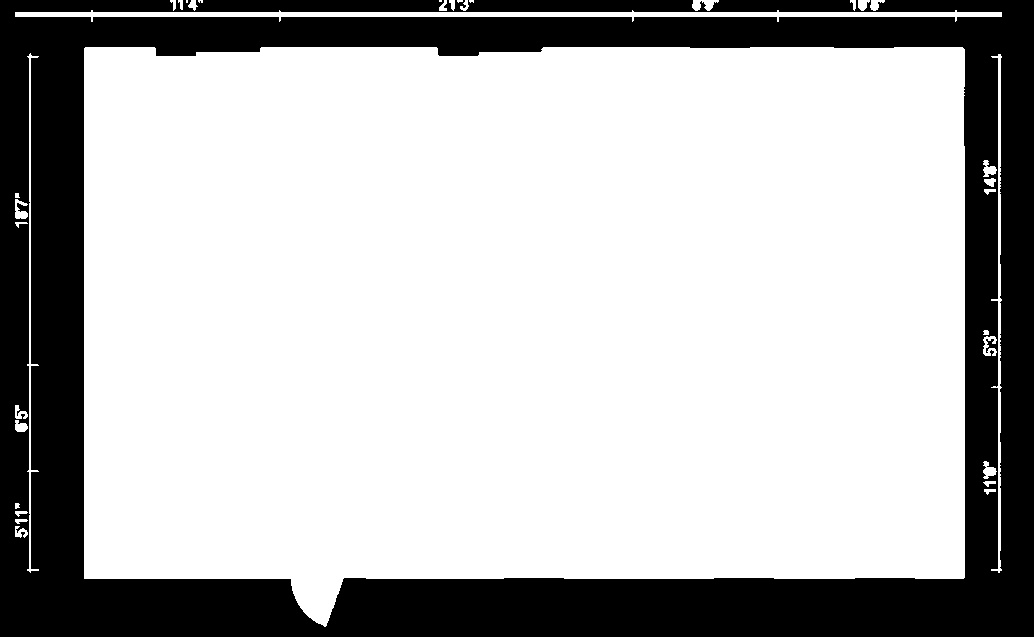

In [31]:
#edge detection on the basis of ROI

#bgr = cv2.imread('C:/Users/ChinmayB/savedImage.jpg')
bgr = cv2.imread("C:/Users/ChinmayB/Downloads/pexels-moose-photos-1036635.jpg")
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
_, roi = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
cv2.imwrite('roi11.jpg', roi)

#cv2.imshow("roi",roi)
cont = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(output, cont[0], -1, (255, 255, 255))

# removing boundary
boundary = 255*np.ones(gray.shape, dtype=np.uint8)
boundary[1:boundary.shape[0]-1, 1:boundary.shape[1]-1] = 0

toremove = output & boundary
output = output ^ toremove

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


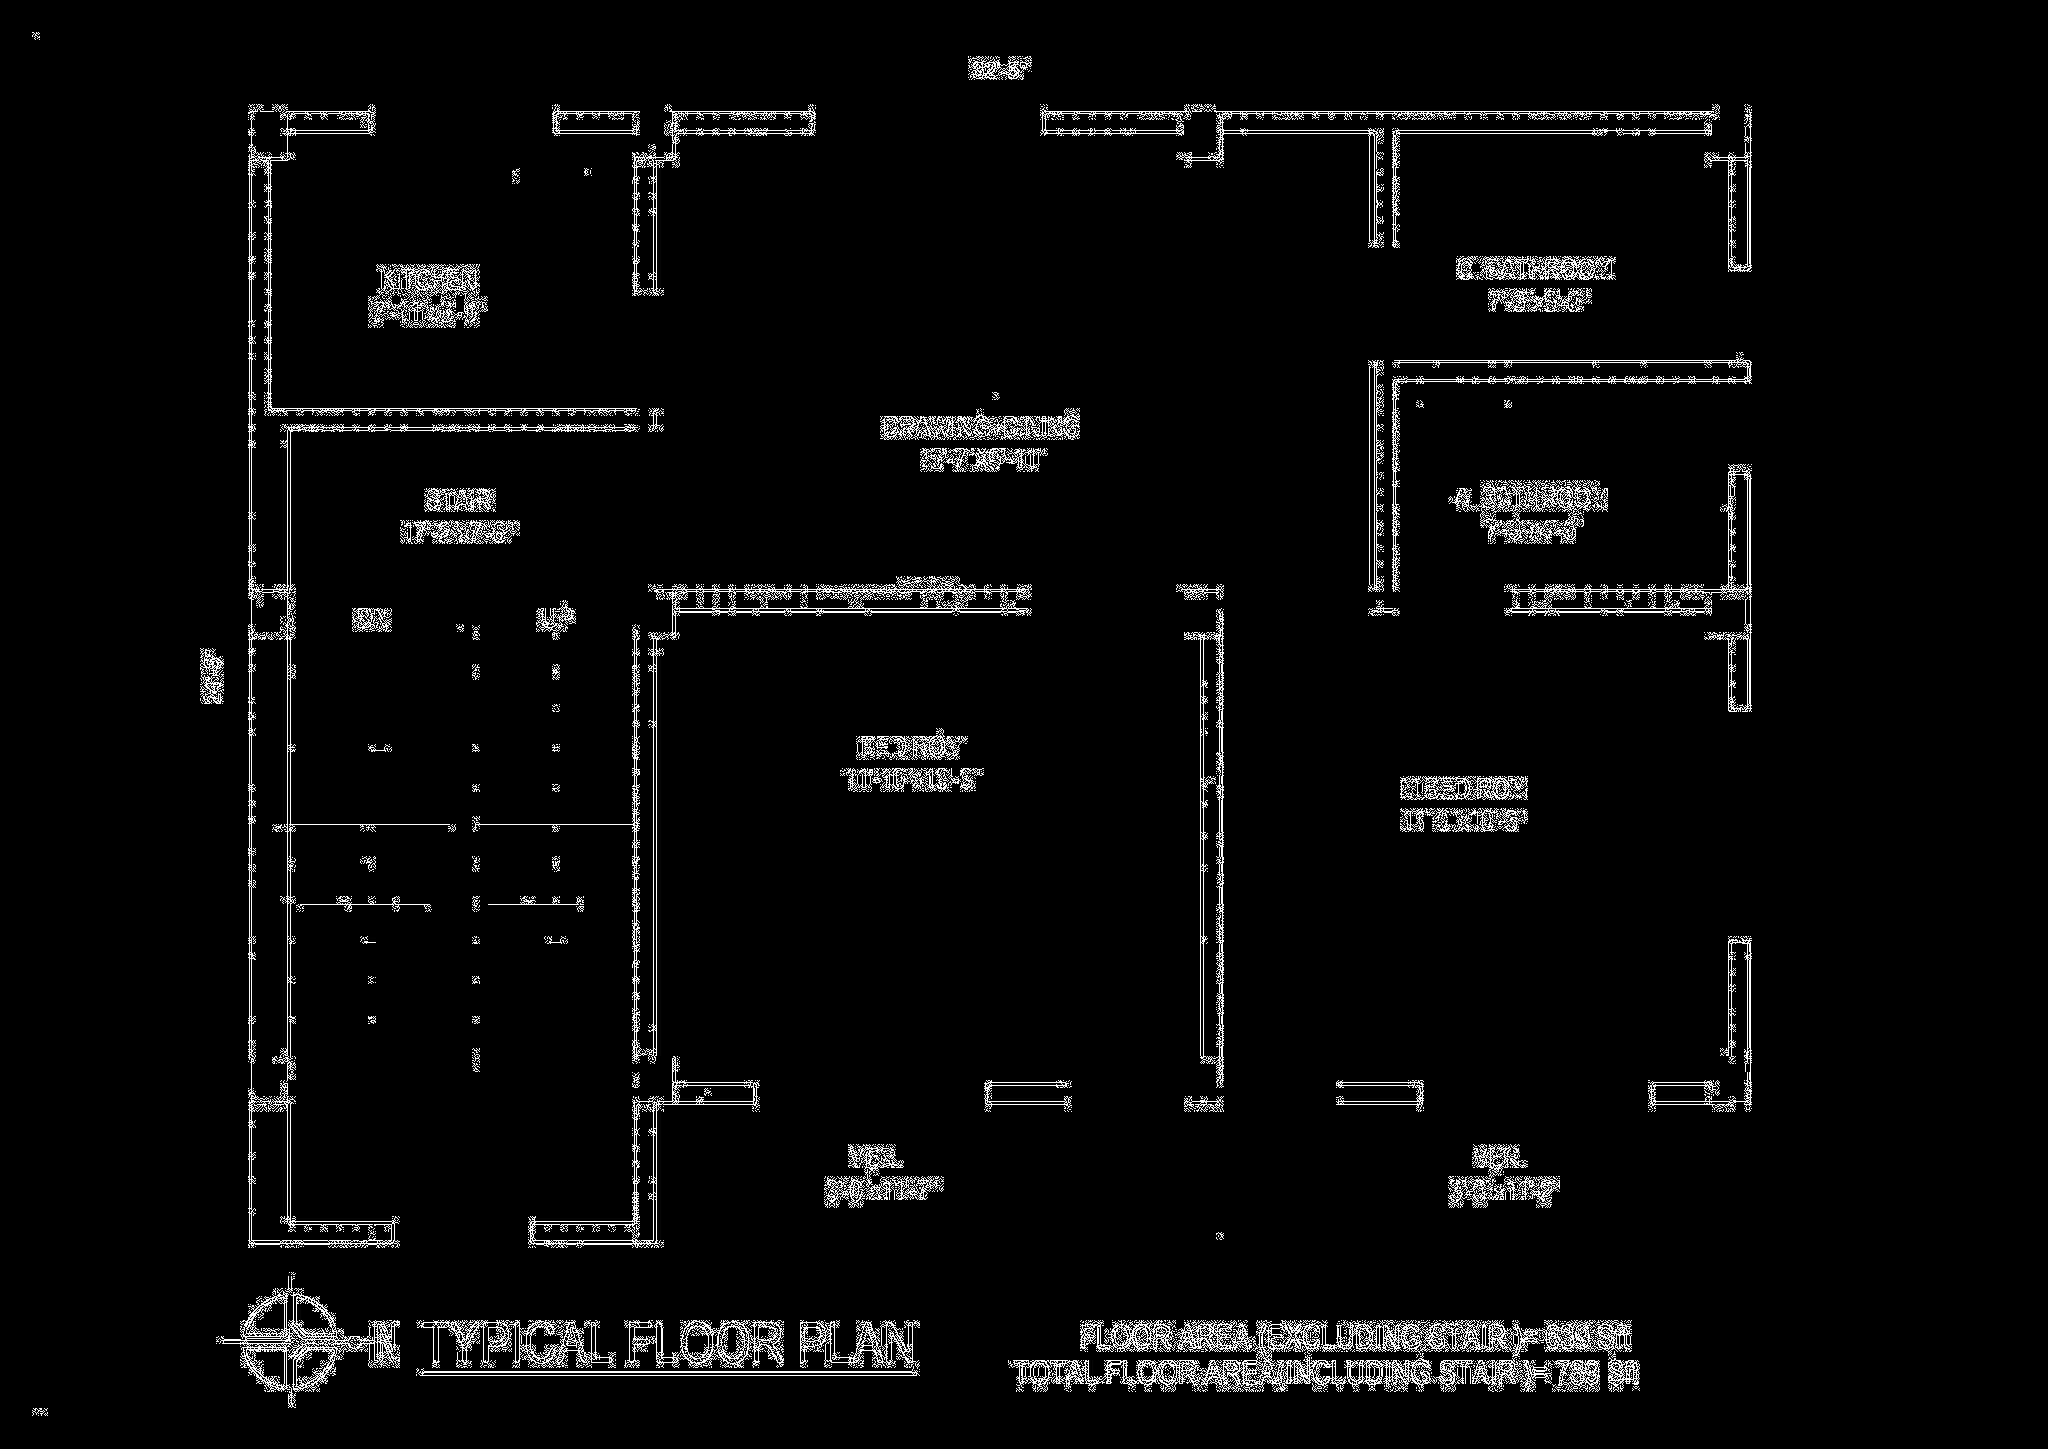

In [29]:
#Edges detection using PIL library

from PIL import Image, ImageFilter  
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"C:/Users/ChinmayB/Downloads/free-modern-house-plans-pdf-free-2048x1449.jpg")
#image = cv2.imread(r"C:/Users/ChinmayB/Downloads/pexels-moose-photos-1036635.jpg")
# Converting the image to grayscale, as edge detection 
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
  
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
  
# Saving the Image Under the name Edge_Sample.png

image.save(r"Edge_Sample1.png")

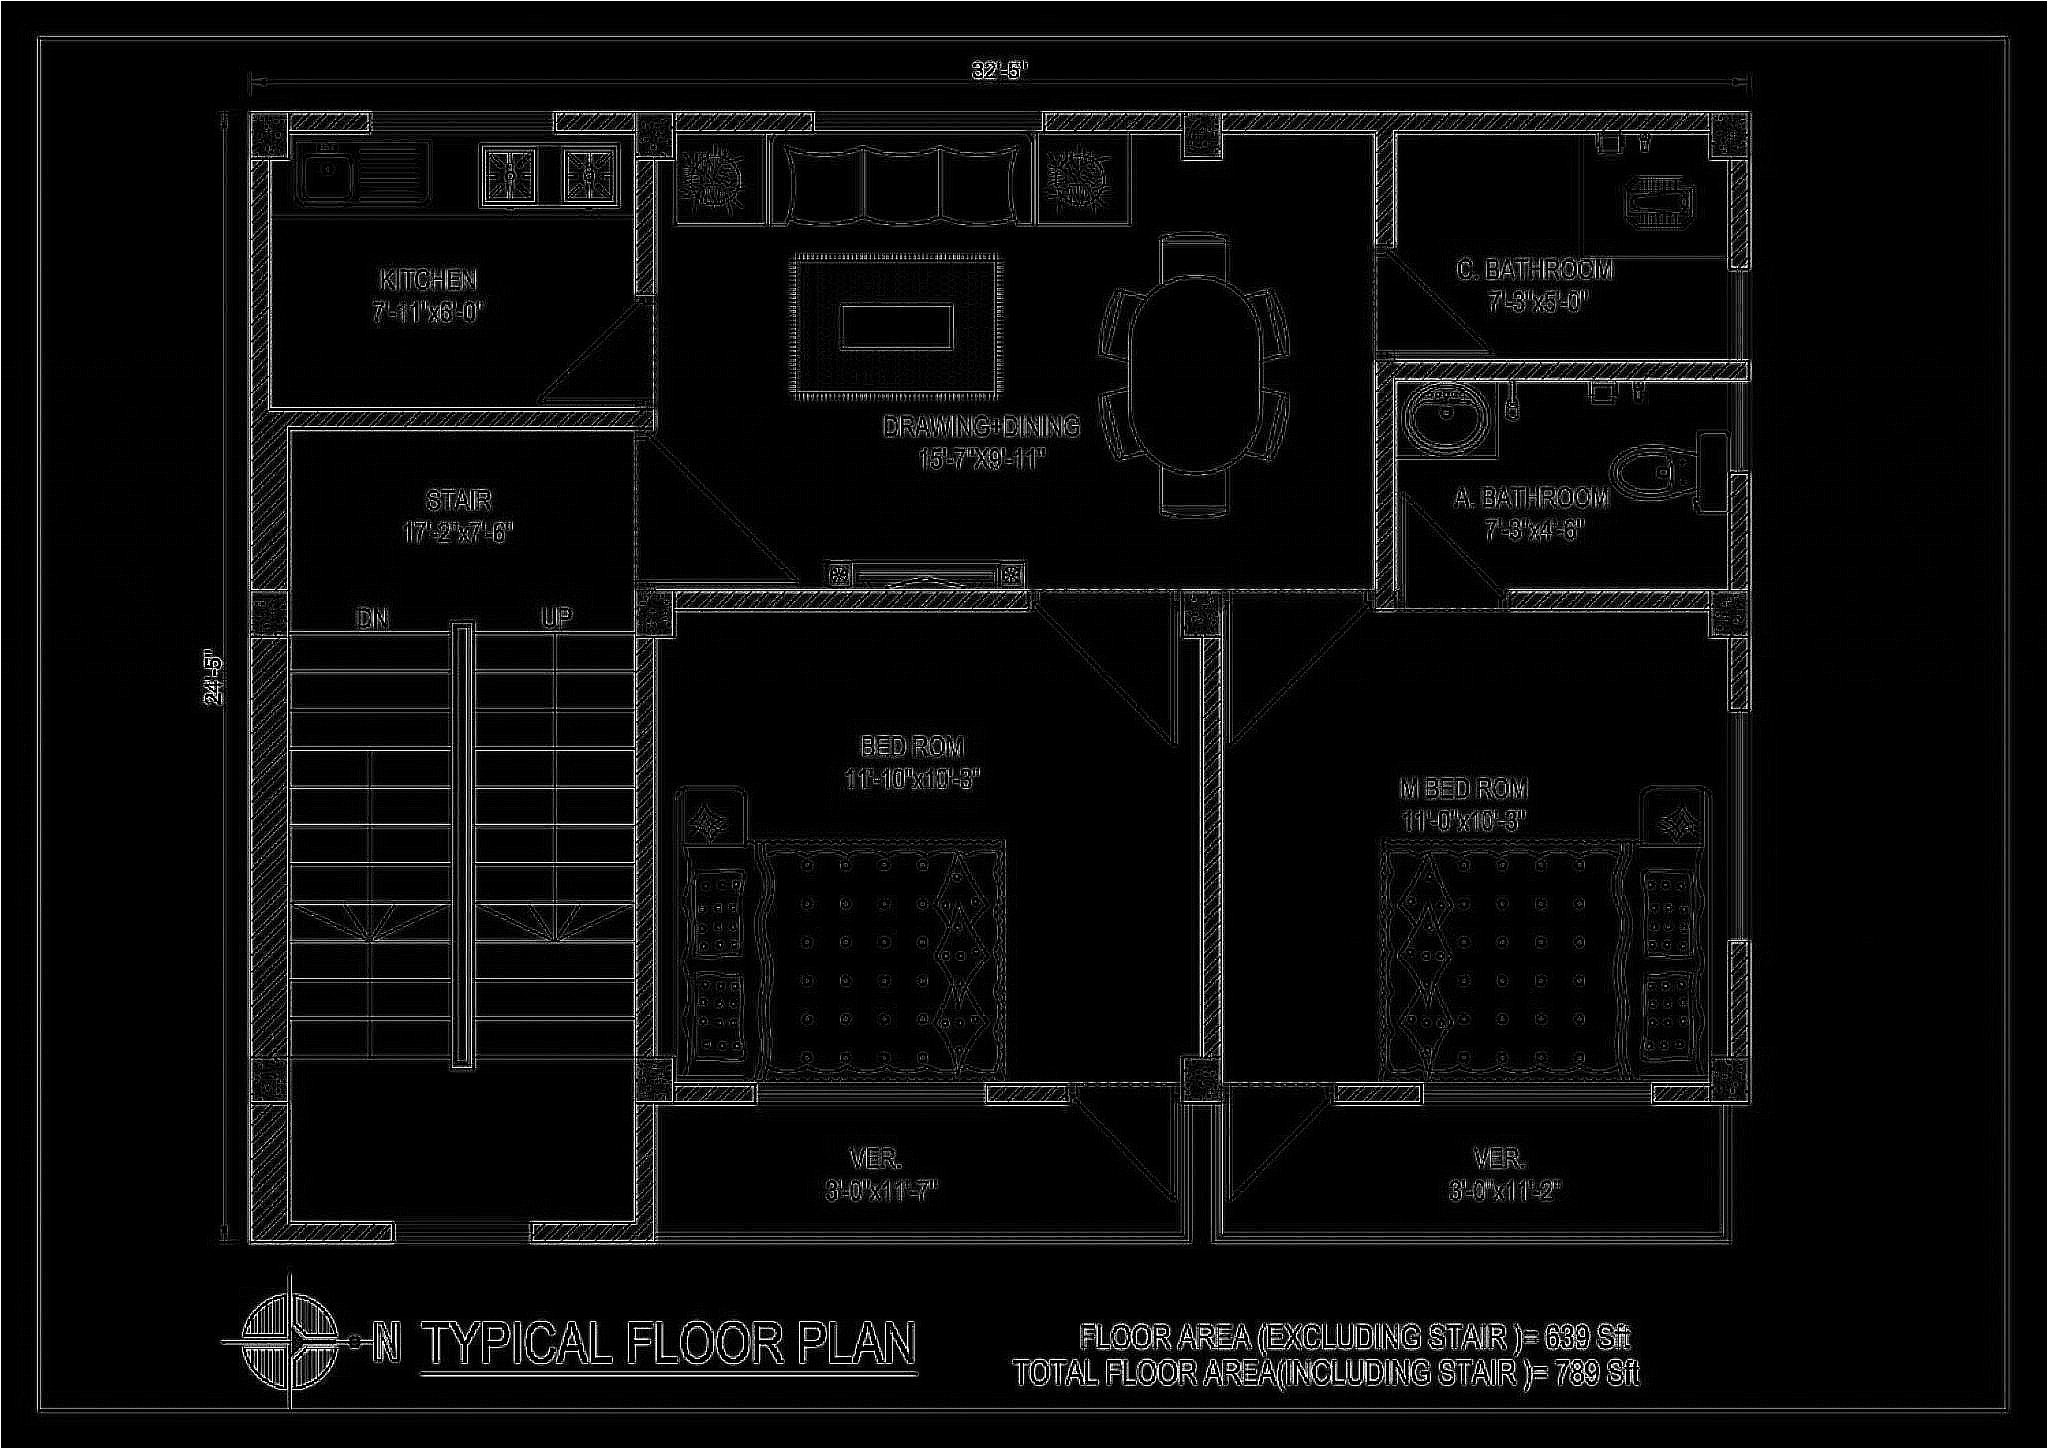

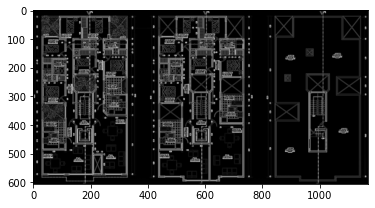

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
vertical_filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
horizontal_filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
img = plt.imread("C:/Users/ChinmayB/Downloads/test_floor_plan.jpg")
n,m,d = img.shape
edges_img = np.zeros_like(img)


for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = img[row-1:row+2,col-1:col+2, 0]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row,col] = [edge_score]*3
    
edges_img = edges_img/edges_img.max()

plt.imshow(edges_img)